## Oppgave 6: Varmeligning,  (10 poeng)

Nå skal vi modellere steking av et legeme i en ovn. Vi ser på et tverrsnitt av legemet, slik at vi kun trenger de to koordinatretningene $x$ og $y$, og ikke dybderetningen $z$ for ovnen og legemet. 

Den partielle differensiallikningen er lik
$$
\begin{align}\tag{19}
u_t = \alpha\cdot(u_{xx} + u_{yy}),
\end{align}
$$
hvor $\alpha$ er legemets *termiske diffusivitet*. Passende tall for $\alpha$ kan slås opp på nett.

Vi antar at temperaturen av luft i ovnen holdes konstant på $200$ grader Celsius hele tiden, og bruker altså randbetingelsene at $u(x,y)=200$ på alle kantene av legemet.

Differensialligningen er kun definert for legemet, vi tar ikke med ovnen rundt i denne oppgaven.

Ved tiden $t=0$ (når legemet settes i ovnen) så er temperaturen lik $15$ grader i hele legemet.

### a)

Velg en gjenstand å ta utgangspunkt i, hvor gjendstanden skal ha et rektangulært tverrsnitt. Hvilket materiale har gjenstanden, og hva er den termiske diffusitiviteten $\alpha$?

Bestem deretter hvilke verdier for koordinatene $x$ og $y$ som beskriver gjenstanden.

### b)

Sett opp den partielle differensiallikningen med rand- og initialbetingelser. Løs deretter likningen numerisk.

Legg ved *varmeplot* (altså fargeplot med rødt for varmt og blått for kaldt) for noen ulike tidspunkt.

### c)

Hvor lang tid tar det før temperaturen i midten av legemet når 60 grader? Legg ved et varmeplot for tidspunktet dette skjer.

### d)

Lag en animasjon som viser hvordan temperaturen til legemet endrer seg over tid.

Dere trenger ikke å ta med animasjonen i rapporten, men inkluder kildekode og forklar hva dere observerer.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy.linalg as la


xsize = 100  # cm
ysize = 100  # cm

m = 100
n = 100

alpha = 12.90  #termisk diffusivitet VIKTIG AT DETTE ER I CM^2/S
dx = xsize / (m + 1)
dy = ysize / (n + 1)
dt = 0.01  #tid/steg
steps = 6000 #antall steg
tid = dt*steps #total tid

x = np.linspace(0, xsize, m + 2)
y = np.linspace(0, ysize, n + 2)

U0 = np.ones((m, n)) * 15
U0[:, 0] = U0[:, -1] = 200
U0[0, :] = U0[-1, :] = 200

#deriverer for uxx og uyy, og bruker varmeligninga? ok 
def f(u, t):
    u_xx = (np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)) / dx**2
    u_yy = (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / dy**2
    return alpha * (u_xx + u_yy)

def euler(U, dt, steps):
    u = np.copy(U)
    for t in range(steps):
        u += dt * f(u, t)
        u[:, 0] = u[:, -1] = 200
        u[0, :] = u[-1, :] = 200
    return u

Midten av legemet treffer 60 grader etter 2734 tidssteg, 27.340 sekunder, og da er temperaturen 60.022 grader.


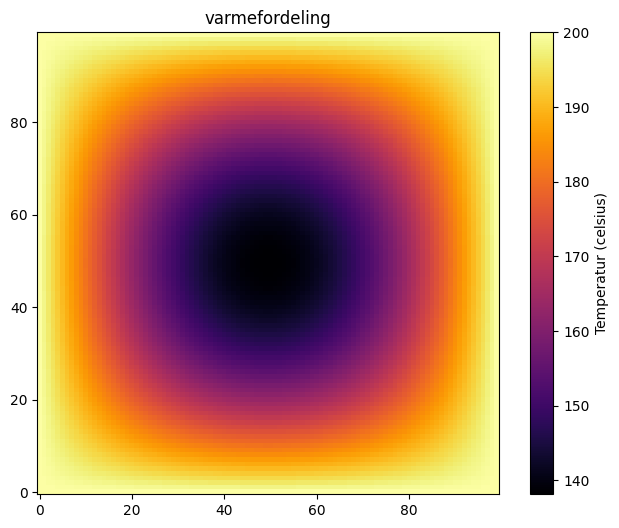

In [7]:
ims = []

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('varmefordeling')

for i in range(0, steps, 70): 
    u_step = euler(U0, dt, i)
    if u_step[50,50] <= 60:
        indeks = i
    im = ax.imshow(u_step, cmap='inferno', animated=True, origin='lower')
    ims.append([im])

i = indeks - 140

u_step = euler(U0, dt, i)

while u_step[50,50] < 60.0:
    u_step = euler(U0, dt, i)
    i += 1
i = i - 1

print(f"Midten av legemet treffer 60 grader etter {i} tidssteg, {i*dt:.3f} sekunder, og da er temperaturen {u_step[int(m/2),int(n/2)]:.3f} grader.")

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Temperatur (celsius)')

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_jshtml())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definerer variabler
u_max = 1
v_max = 100
u = np.linspace(0, u_max, 100)

# Lineær modell
v1 = v_max * (1 - (u / u_max))

# Logaritmisk modell
v2 = v_max * (1 - np.log(1 + u) / np.log(1 + u_max))

# Trigonometrisk modell
v3 = v_max * np.cos((np.pi/2) * (u/u_max))

# Plotter hastighetsmodellene
plt.plot(u, v1, label="Lineær")
plt.plot(u, v2, label="Logaritmisk")
plt.plot(u, v3, label="Trigonometrisk")

plt.xlabel("Tetthet u")
plt.ylabel("Hastighet v")
plt.legend()
plt.title("Forskjellige v(u)-modeller")
plt.grid()
plt.show()
